# Kalorimetrie Laborversuch

Author: Daniel Burgos

Datum: 08.12.2023

Gruppe: 45

## Forschungsfrage

Inwieweit lassen sich unterschiedliche spezifische Wärmekapazitäten aus einem Versuch aufgenommenen Daten digital berechnen und auswerten?

## Versuchsaufbau und Durchführung

Der Versuchsaufbau besteht aus einem Becherglas auf einer magnetischen Rührplatte. Im Becherglas befindet sich ein Magnetrührer, der das Wasser im Becherglas durchwirbelt. Im Becherglas befinden sich 3 Temperatursensoren, die die Temperatur des Wassers aufnehmen. Zum bestimmen der Calorimeter-Konstante wird ein Tauchsieder verwendet. Die Stromstärke und Spannung des tauchsieders wird über ein Labornetzgerät eingestellt. Zur Probenvorbereitung wird ein isolierter Topf und ein Sou vide verwendet um die Wassertemperatur konstant zu halten. Im Wassertopf und an der Umgebung befindet sich jeweils ein Sensor zum Aufnehmen der Umgebungstemperatur, bzw. der Probentemperatur. 

Zunächst wird die Colorimeter-Konstante des Calorimeters bestimmt.Dafür wird das Becherglas mit einer definierte Wassermenge befüllt und über den Tauchsieder eine definierte elektrische leistung zugeführt. Aus der Masse, der zugeführten Leistung und der gemessenenen Temperaturdifferenz lässt sich so die Calorimeter-Konstante berechnen. 

Mit der Calorimeter-Konstante lassen sich die spezifischen Wärmekapazitäten einzelner Proben berechnen. Dafür werden noch die Massen und Temperaturen betimmt. Die Probe wird im Wasserbecken auf 80°C erwärmt. Anschließend wird die Probe in das Becherglas befördert und die Temperaturübertragung der Probe in das Wasser des Becherglas wird gemessen.
Die Temperaturänderung wird dabei gemessen, bis diese für ca. 30s konstant bleibt. Anschließend wurde die Probe entfernt und das verbleibende Wasser gewogen, um eventuel eingebrachtes Wasser aus dem Kochtopf zu bestimmen.

<img src="figures/Versuchsaufbau.jpeg" width="800">


## Versuchsauswertung

In [43]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [44]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = 'data/Versuch_constant/Versuch_constant.h5'

#sensor_2_path = "RawData/RawData/"+uuids[1]

# DONE #

In [45]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const,'RawData')
# DONE #

In [46]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [0, 1, 2]
index_environment = [-1]
# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [47]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_environment])
# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

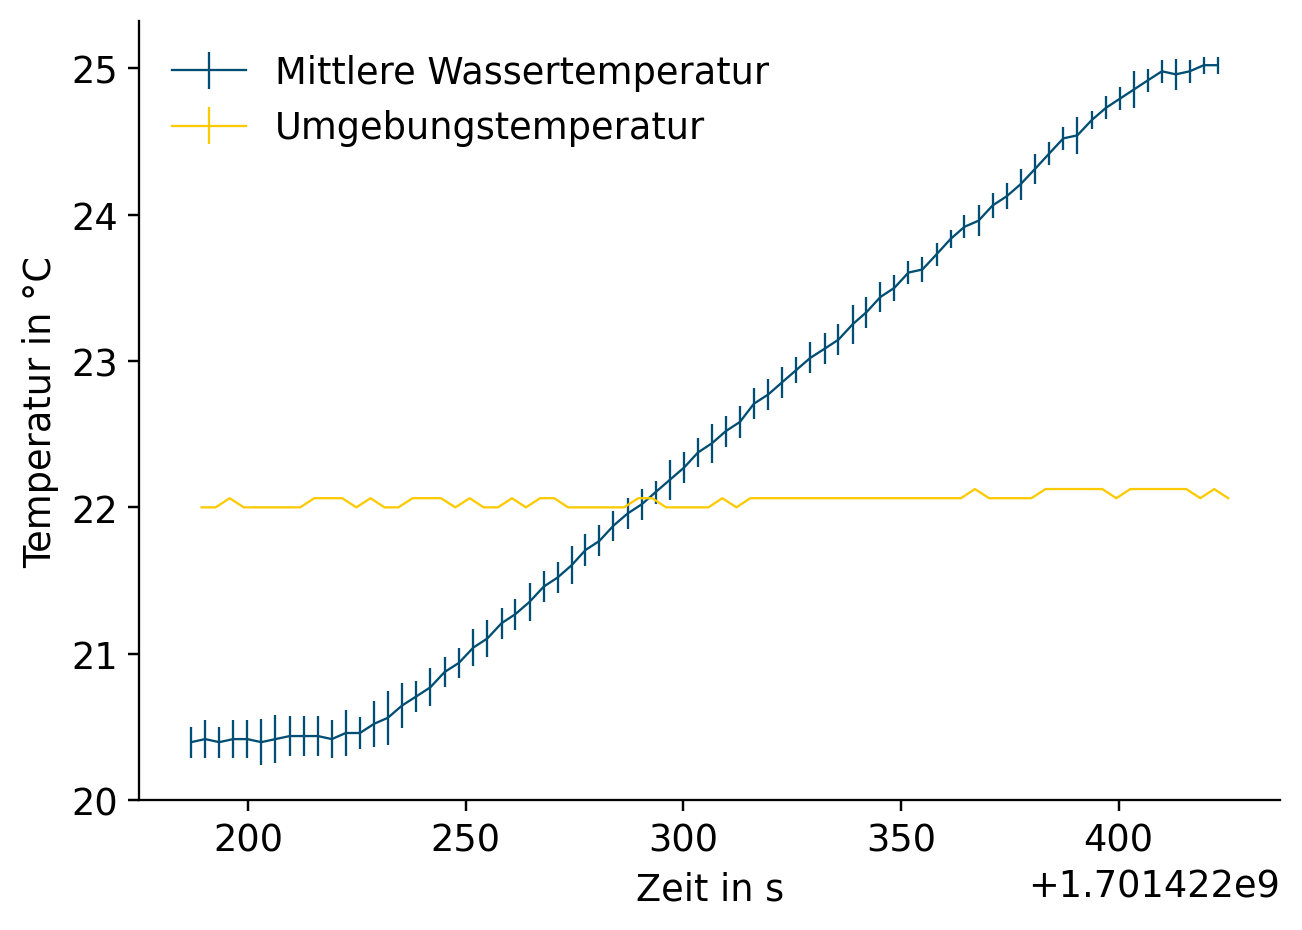

In [48]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

utility.plot_temp_over_time([mean_std_calorimeter,mean_std_environment],[data_dict['timestamp'][index_calorimeter][0],data_dict['timestamp'][index_environment][0]] ,['Mittlere Wassertemperatur','Umgebungstemperatur'],'Zeit in s','Temperatur in °C')

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [49]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.

water_mass = m_json.get_json_entry('data/Versuch_constant', '1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753', ['calorimeter','medium','mass','value'] )
# DONE #

In [50]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.
f = h5.File(datafile_path_const, 'r')
RawData = f["RawData"]
uuids= list(RawData.keys())
d1_path = "RawData/"+uuids[0]
heater_data = f[d1_path]

current = heater_data['current'][()]
heat_time = heater_data['time'][()]
voltage = heater_data['voltage'][()]
# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [51]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(data_dict['temperature'][index_calorimeter]) 

# DONE #

#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [52]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = (current*voltage*heat_time)/(temperature_end-temperature_start)
# DONE #

#### (Vii) Ergebnis

In [53]:
calorimeter_const

1860.923076923077

### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [54]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = 'data/heat_capacity_Probe_001/heat_capacity_Probe_001.h5'

# DONE #

In [55]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1,'RawData')
# DONE #

In [56]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0, 1, 2]
index_bath = [4]
index_env = [3]
# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [57]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])

# DONE #

#### (iii) Daten ploten

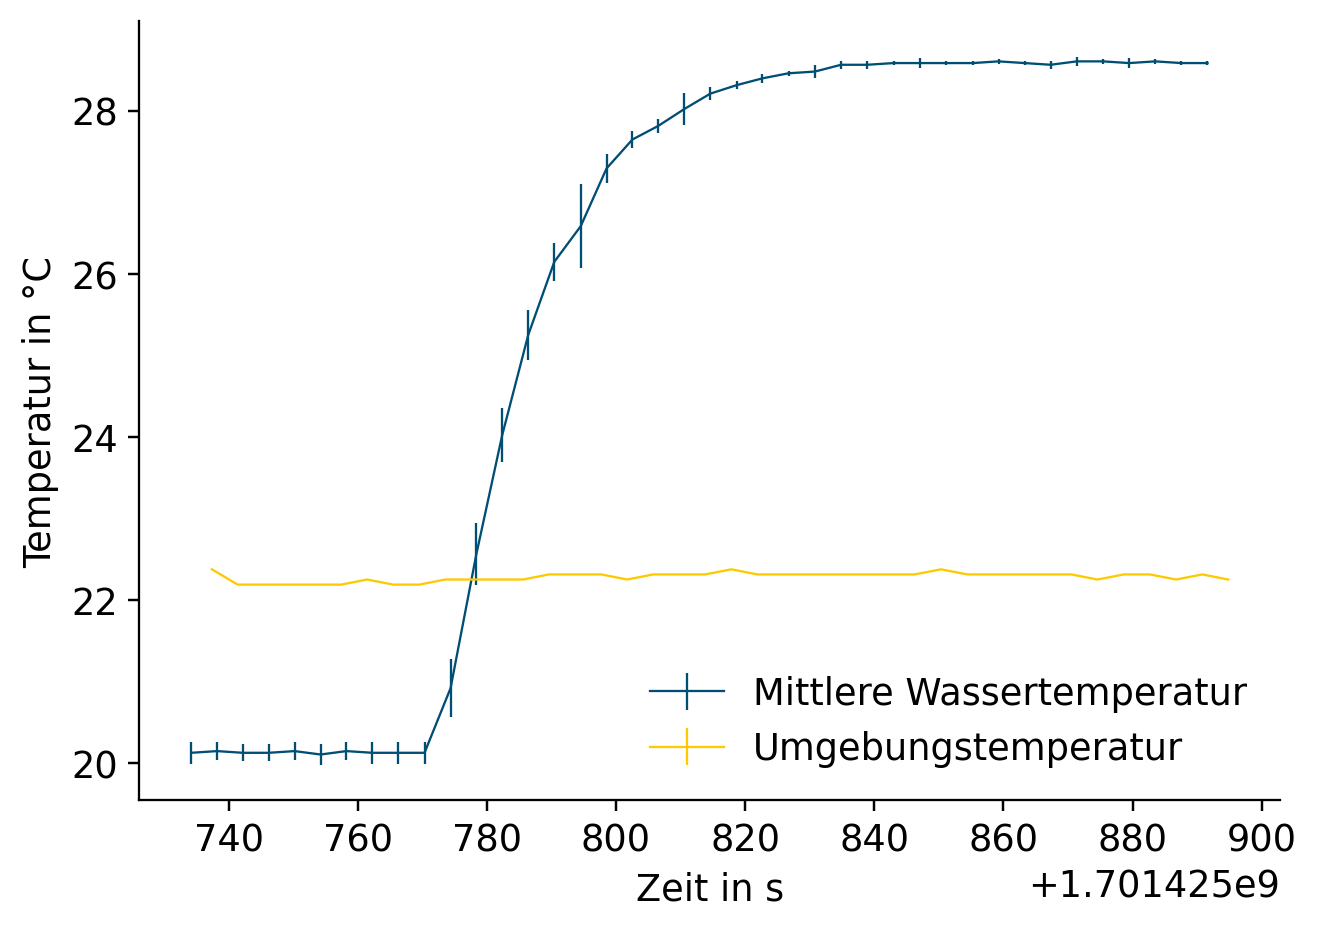

In [58]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([mean_std_calorimeter,mean_std_environment],[data_dict['timestamp'][index_calorimeter][0],data_dict['timestamp'][index_environment][0]] ,['Mittlere Wassertemperatur','Umgebungstemperatur'],'Zeit in s','Temperatur in °C')

# DONE #

#### (iv) Metadaten auslesen

In [59]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass =  m_json.get_json_entry('data/heat_capacity_Probe_001','1ee57b26-cc42-6a6e-b609-c4f6b4a81128', ['probe','mass','value'])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [60]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][index_calorimeter]) 

# DONE #

In [61]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(data_dict['temperature'][4][0:9])
# DONE #

#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [62]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [63]:
sample_heat_capa

0.5058723970123279

### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [64]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = 'data/heat_capacity_Probe_008/heat_capacity_Probe_008.h5'

# DONE #

In [65]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2,'RawData')

# DONE #

In [66]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [67]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])
# DONE #

#### (iii) Daten ploten

In [68]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([mean_std_calorimeter,mean_std_environment],[data_dict['timestamp'][index_calorimeter][0],data_dict['timestamp'][index_environment][0]] ,['Mittlere Wassertemperatur','Umgebungstemperatur'],'Zeit in s','Temperatur in °C')


# DONE #

#### (iv) Metadaten auslesen

In [69]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry('data/heat_capacity_Probe_008','1ee57b34-54c3-61c9-96d0-8a12036882d3', ['probe','mass','value'])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [70]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][index_calorimeter]) 

# DONE #

In [71]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict['temperature'][4][0:9])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [72]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [73]:
sample_heat_capa

1.2025755806577725

### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [74]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = 'data/heat_capacity_Probe_016/heat_capacity_Probe_016.h5'

# DONE #

In [75]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3, 'RawData')

# DONE #

In [76]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [77]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])

# DONE #

#### (iii) Daten ploten

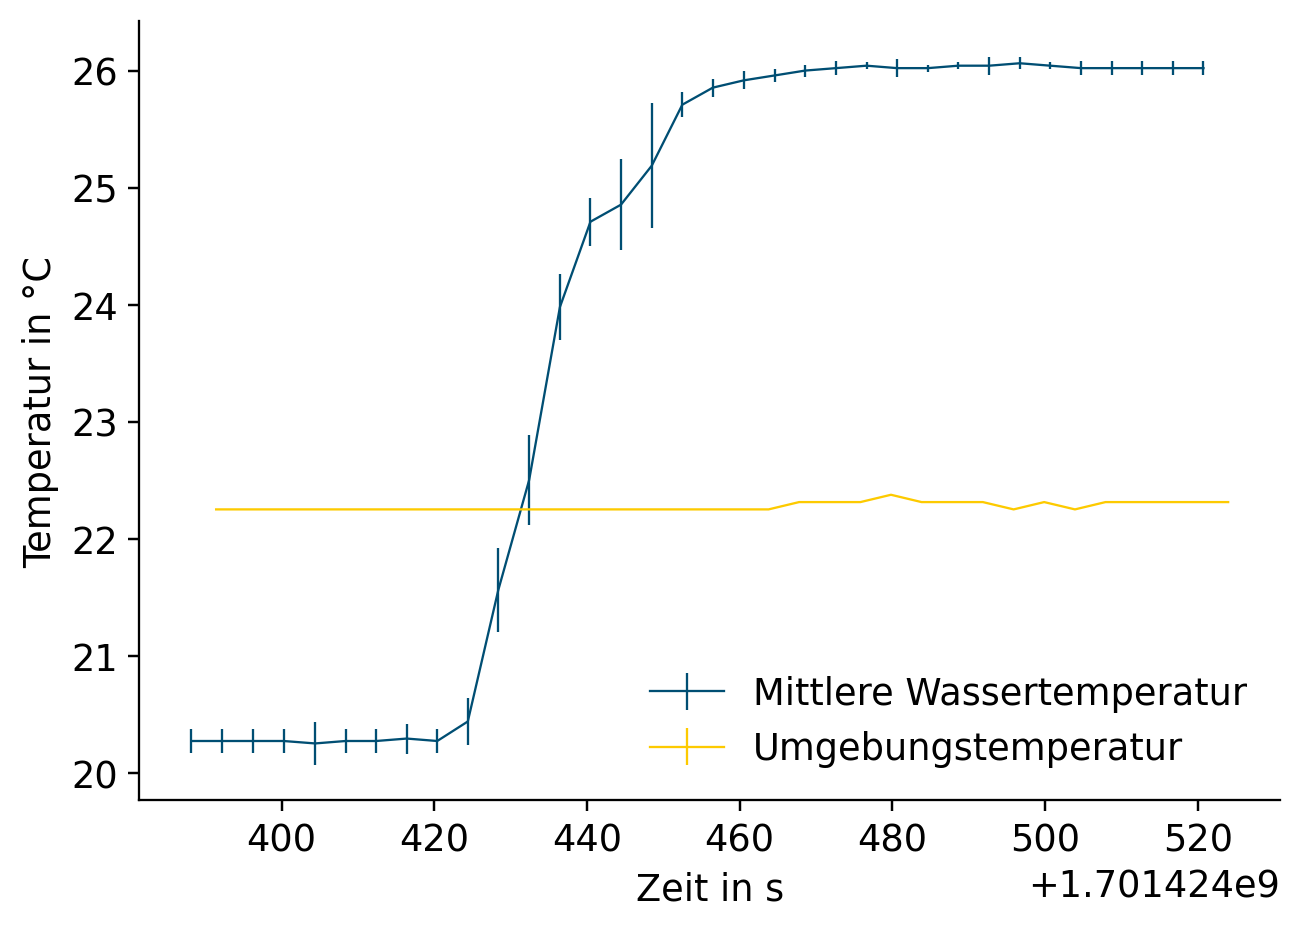

In [78]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([mean_std_calorimeter,mean_std_environment],[data_dict['timestamp'][index_calorimeter][0],data_dict['timestamp'][index_environment][0]] ,['Mittlere Wassertemperatur','Umgebungstemperatur'],'Zeit in s','Temperatur in °C')

# DONE #

#### (iv) Metadaten auslesen

In [79]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry('data/heat_capacity_Probe_016','1ee57b3c-b98a-64f2-aea5-ac942cc2bc1b', ['probe','mass','value'])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [80]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][index_calorimeter]) 

# DONE #

In [81]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict['temperature'][4][0:9])


# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [82]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [83]:
sample_heat_capa

0.9439226025141725

## Diskussion
Währen der Versuchsauswertung konnten folgende spezifische Wärmekapazitäten der Proben bestimmt werden:
$$
c_{Edelstahl} = 0.51 \frac{J}{gK};\: 
c_{PVC} = 1,2\frac{J}{gK};\: 
c_{Aluminium} = 0,94\frac{J}{gK}
$$
Anschließend werden diese mit den Literaturwerten für die Probenstoffen verglichen:

$$
c_{Edelstahl,0} = 0.5 \frac{J}{gK};\: 
c_{PVC,0} = 0,85\frac{J}{gK};\: 
c_{Aluminium,0} = 0,896\frac{J}{gK}
$$

Die Abweichungen der ermittelten spezifischen Wärmekapazitäten ergeben sich für $c_{Edelstahl}$ zu einer Abweichung von 2%, für $c_{PVC}$ eine Abweichung von 29% und für $c_{Aluminium}$ eine Abweichung von 4,9%. Man erkennt, dass die Abweichungen von Edelstahl und Aluminium relativ gering sind. Die Abweichung der Werte von PVC ist nicht zu vernachlässigen. Dies kann darauf zurückgeführt werden, dass PVC je nach seiner Zusammensetzung und Additiven eine unterschiedliche Wärmekapazität aufweisen kann, als der recherchierte Wert, da die genau Zusammensetzung der Probe nicht bekannt ist. Es lässt sich auch im Hinblick auf die Forschungsfrage beantworten, dass die spezifischen Wärmekapazitätet mit dem verwendeten Versuchsaufbau relativ genau bestimmt werden kann. Bei dem Hinzufügen  der Probe zum Becherglas besteht die Gefahr, dass an der Probe anhaftendes eingetragenes Wasser die gemessenen Ergebnisse verfälscht. Aus diesem Grund wurde das verbleinde Wasser des Becherglases nach dem Versuch gemessen. Bei den Proben aus Edelstahl und Aluminium konnte eine Gewichtsdifferenz des Wassers von 1g gemessen werden. Dieser Eintrag ist allerdings zu vernachlässigen, da die verwendete Wage bereits eine Messungenauigkeit von 1g aufweißt und durch an den Sensoren und deren Halterungen anhfaftendes Wasser entnommen wird. Daraus lässt sich schließen, dass der Wassereintrag durch anhaftendes Wasser an der Probe während der Datenaufnahme keinen Einfluss auf die Messergebnisse hatte.

## Fazit
Es ist möglich die spezifische Wärmekapazitat mit dem versuchsaufbau zu bestimmen. Ich habe viel über tatsächliche versuchsdurchführung bei der Bearbeitung des Aufgabenteils gelernt. Es wurde erneut ersichtlich, dass eine sorgfällltige vorbereitung der programierten Messprogramme, sowie Auswertungsfunktionen essentziell für eine gut Verlaufende Versuchdurchführung und Ergebnissauswertung sind. Auch ist es teilweise eine Herrausforderung sich an bereits bestehende Code-schnipsel zu Orientieren und das intendierte Vorgehen zu vestehen.